<a href="https://colab.research.google.com/github/Bhavnajha12/match-winning-probability/blob/main/stats1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [ ]:
df_matches = pd.read_csv("/content/matches.csv")
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
df_matches.shape

(756, 18)

In [ ]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

If Delhi Daredevils is going play 10 more matches find the probability of

1. Winning all games  
2. Winning no games
3. Winning al least 4 games
4. Winning 5 games
5. Winning at most 7 games
6. What is expected number of winning matches with standard deviation.

In [ ]:
# step 1 calculate the probability of winning for delhi Daredevils

In [ ]:
# CREAT THE DATASET FOR DELHI DAREDEVILS
#delhi daredevils has to be one of the team playing the match
df_DD = df_matches[(df_matches['team1'] =='Delhi Daredevils')| (df_matches['team2'] == 'Delhi Daredevils')]
df_DD.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
17,18,2017,Delhi,2017-04-17,Delhi Daredevils,Kolkata Knight Riders,Delhi Daredevils,bat,normal,0,Kolkata Knight Riders,0,4,NM Coulter-Nile,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
20,21,2017,Hyderabad,2017-04-19,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,15,0,KS Williamson,"Rajiv Gandhi International Stadium, Uppal",CB Gaffaney,NJ Llong,NaN


In [ ]:
 # Calculate the probability

 DD_matches = df_DD.shape[0]
 DD_Won = df_DD[df_DD['winner'] == 'Delhi Daredevils'].winner.count()
 p_winning = DD_Won/DD_matches
 print(DD_matches, DD_Won,p_winning)

161 67 0.4161490683229814


In [ ]:
### calculate binomial frequency distribution for the event
# Calculate probability distribution funtion and cumulative distributiob
n = 10
k = np.arange(0,11)
bin_dist = stats.binom.pmf(k,n,p_winning)
bin_dist

array([4.60277532e-03, 3.28070156e-02, 1.05226757e-01, 2.00005468e-01,
       2.49474906e-01, 2.13380664e-01, 1.26742061e-01, 5.16213865e-02,
       1.37977376e-02, 2.18545726e-03, 1.55771954e-04])

In [ ]:
bin_cum = stats.binom.cdf(k,n,p_winning)
bin_cum

array([0.00460278, 0.03740979, 0.14263655, 0.34264202, 0.59211692,
       0.80549759, 0.93223965, 0.98386103, 0.99765877, 0.99984423,
       1.        ])

In [ ]:
#p(winning all games)=?
print('a) probability ofwinning all the games ? is %1.4f' %bin_dist[10])

a) probability ofwinning all the games ? is 0.0002


In [ ]:
#p(winning no games)=?
print('a) probability ofwinning no games? is %1.4f' %bin_dist[0])

a) probability ofwinning no games? is 0.0046


In [ ]:
#p(winning at least 4 games)=?
# at least 4 games means it can win 4,5,.....all games. but it can never win 3 or lesser
p = 1-bin_cum[3]
print('3) probability of winning at least 4 games? is %1.4f' %p)

3) probability of winning at least 4 games? is 0.6574


In [ ]:
#p(winning 5 games)=?
print('a) probability of winning 5 games? is %1.4f' %bin_dist[5])

a) probability of winning 5 games? is 0.2134


In [ ]:
#p(winning at the most 7 games)?
print('a) probability of winning at most 7 games is %1.4f' %bin_cum[7])


a) probability of winning at most 7 games is 0.9839


In [ ]:
# Expected values is equivalent to mean
mean = n* p_winning # = 3*0.41
sd = np.sqrt(n * p_winning * (1 - p_winning))
print('mean and standard deviation of the match winning are %1.4f and %1.4f respectively' %(mean,sd))

mean and standard deviation of the match winning are 4.1615 and 1.5587 respectively


 PROBABILITY OF WINNING MUMBAI INDIANS

 If mumbai indians won 51 matches in this find out the probability for it
 1. winning more than 40
 2. winning more than 30
 3. winning max 40 mtchs
 4. winning 55 matchs

In [ ]:
## poison distribution
#mean and variance are equal

In [ ]:
# CREAT THE DATASET FOR MUMBAI INDIANS
# MUMBAI INDIAN has tobe one of the team playing the match
df_MI = df_matches[(df_matches['team1'] =='Mumbai Indians')| (df_matches['team2'] == 'Mumbai Indians')]
df_MI.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
11,12,2017,Bangalore,2017-04-14,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN
15,16,2017,Mumbai,2017-04-16,Gujarat Lions,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,N Rana,Wankhede Stadium,A Nand Kishore,S Ravi,NaN


In [ ]:
# Calculate the probability

MI_matches = df_MI.shape[0]
MI_Won = df_MI[df_MI['winner'] == 'Mumbai Indians'].winner.count()
p_winning = MI_Won/MI_matches
print(MI_matches, MI_Won,p_winning)

187 109 0.5828877005347594


In [ ]:
### poissom distribution
rate = 51
n = np.arange(0,60)
po_dist = stats.poisson.pmf(n,rate)
po_dist


array([7.09547416e-23, 3.61869182e-21, 9.22766415e-20, 1.56870291e-18,
       2.00009620e-17, 2.04009813e-16, 1.73408341e-15, 1.26340363e-14,
       8.05419812e-14, 4.56404560e-13, 2.32766326e-12, 1.07918933e-11,
       4.58655464e-11, 1.79934067e-10, 6.55474100e-10, 2.22861194e-09,
       7.10370056e-09, 2.13111017e-08, 6.03814548e-08, 1.62076537e-07,
       4.13295168e-07, 1.00371684e-06, 2.32679812e-06, 5.15942192e-06,
       1.09637716e-05, 2.23660940e-05, 4.38719537e-05, 8.28692459e-05,
       1.50940412e-04, 2.65446932e-04, 4.51259784e-04, 7.42395128e-04,
       1.18319224e-03, 1.82856982e-03, 2.74285473e-03, 3.99673117e-03,
       5.66203583e-03, 7.80442777e-03, 1.04743636e-02, 1.36972447e-02,
       1.74639870e-02, 2.17234960e-02, 2.63785308e-02, 3.12861645e-02,
       3.62635088e-02, 4.10986434e-02, 4.55658872e-02, 4.94438350e-02,
       5.25340747e-02, 5.46783227e-02, 5.57718891e-02, 5.57718891e-02,
       5.46993528e-02, 5.26352263e-02, 4.97110470e-02, 4.60956982e-02,
      

In [ ]:
po_cum = stats.poisson.cdf(n,rate)
po_cum

array([7.09547416e-23, 3.68964656e-21, 9.59662880e-20, 1.66466919e-18,
       2.16656312e-17, 2.25675444e-16, 1.95975885e-15, 1.45937951e-14,
       9.51357763e-14, 5.51540336e-13, 2.87920359e-12, 1.36710969e-11,
       5.95366433e-11, 2.39470710e-10, 8.94944811e-10, 3.12355675e-09,
       1.02272573e-08, 3.15383590e-08, 9.19198138e-08, 2.53996350e-07,
       6.67291519e-07, 1.67100836e-06, 3.99780648e-06, 9.15722840e-06,
       2.01210000e-05, 4.24870940e-05, 8.63590477e-05, 1.69228294e-04,
       3.20168706e-04, 5.85615637e-04, 1.03687542e-03, 1.77927055e-03,
       2.96246278e-03, 4.79103260e-03, 7.53388733e-03, 1.15306185e-02,
       1.71926543e-02, 2.49970821e-02, 3.54714457e-02, 4.91686904e-02,
       6.66326773e-02, 8.83561733e-02, 1.14734704e-01, 1.46020869e-01,
       1.82284377e-01, 2.23383021e-01, 2.68948908e-01, 3.18392743e-01,
       3.70926818e-01, 4.25605140e-01, 4.81377030e-01, 5.37148919e-01,
       5.91848272e-01, 6.44483498e-01, 6.94194545e-01, 7.40290243e-01,
      

In [ ]:
#p(winning more than 40 games)=?
p_40 = po_cum[40] # this is the proba'bility of winning upto 40
p_more_than_40 = 1-p_40
print('probability of winning more than30 games? is %1.4f' %p_more_than_40)

probability of winning more than30 games? is 0.9334


In [ ]:
#p(winning more than 30 games)=?
p_30 = po_cum[30] # this is the probability of winning upto 30
p_more_than_30 = 1-p_30
print(' probability ofwinning more than 30 games? is %1.4f' %p_more_than_30)

 probability ofwinning more than 30 games? is 0.9990


In [ ]:
#p(winning maximum 40 games)=?
# p_40 = po_cum[40]# this is probability of winning uoto 40
print('probability of winning maximum 40 games? is %1.4f' %p_40)

probability of winning maximum 40 games? is 0.0666


In [ ]:
#p(winning 55 games)=?
p_55 = po_dist[55] # this is probability of winning upto 40
print('probability of winning 55 games? is %1.4f' %p_55)

probability of winning 55 games? is 0.0461


In [ ]:
np.mean(df_matches['win_by_runs'])

13.283068783068783

<ipython-input-28-4eef94e08231>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(run,kde = False)


<Axes: >

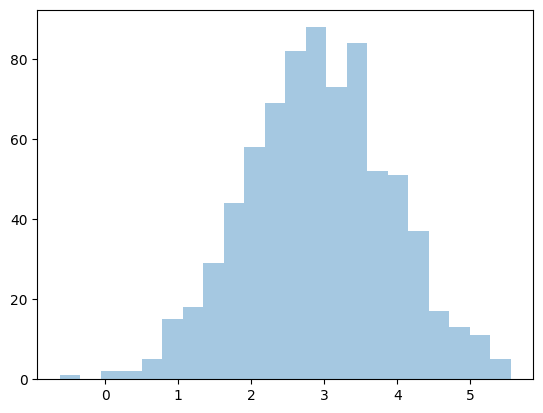

In [ ]:
run = np.random.randn(756)
# run.plot(kind='hist' , title='histogram for win_by_wickets', color='b',bin20);
run = run +3

sb.distplot(run,kde = False)

In [ ]:
runs = np.zeros(756)
for i in range(756):
    run1 = np.random.randint(50,100)
    runs[i] = run1 * abs(run[i])
#sb.distplot(runs, kde = False)

runs

array([139.44359422, 206.18802242, 365.18676393, 185.51569179,
       158.83481395, 228.01537972, 244.62467078, 249.85321083,
       387.46286634, 397.08512759, 275.37967438, 117.52454913,
       153.10936442, 377.90758179, 157.44801613, 103.16354204,
       293.20253789, 221.40382791, 155.74699954, 196.90040162,
       187.66687015, 200.12588599, 212.73587707, 106.701827  ,
       189.12785623, 156.46730065,  94.01653593, 252.2852966 ,
       490.10928484, 189.39642991, 286.08884259, 260.99516112,
       139.09687954, 212.25990508, 154.35791477, 297.90207869,
       171.1479163 , 222.63355407, 164.31441344, 260.15120962,
       172.73587504,  63.95472983, 208.0492518 , 248.93795175,
       281.74543707, 373.85377686, 143.59517534, 296.32241199,
       192.32180637, 229.44572627, 364.62651493, 235.82029361,
       141.54808057, 173.63248041, 177.32260981, 284.42233446,
       359.94362401, 125.05451134, 217.11655215, 346.87552097,
       549.78569131, 196.41474416, 152.86412689, 139.68

In [ ]:
df_matches['tot_runs'] = runs
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,tot_runs
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,139.443594
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,206.188022
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,365.186764
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,185.515692
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,158.834814


In [ ]:
# tatal runs has normal disstribution find the probability of
#1.tatal runs getting scored above 400
#2. tatal runs above300
#3. tatal runs below 300
#4. tatal runs btw 340 and 400

In [ ]:
mu = runs.mean()
sd = runs.std()

In [ ]:
#p(more than 400)
x=400
z=(x-mu)/sd
p = stats.norm.cdf(z)
print('a) probability of 400 runs?is %1.4f' %(1-p))

a) probability of 400 runs?is 0.0181


In [ ]:
#p(more than 300)
x=300
z=(x-mu)/sd
p = stats.norm.cdf(z)
print('a) probability of 300 runs?is %1.4f' %(1-p))

a) probability of 300 runs?is 0.1737


In [ ]:
#p(more below 350)
x=350
z=(x-mu)/sd
p = stats.norm.cdf(z)
print('a) probability of 350 runs?is %1.4f' %(p))

a) probability of 350 runs?is 0.9354


In [ ]:
#p(runs btw350 to 400)
x1 = 350
x2 = 400
z1 =(x-mu)/sd
z2 =(x-mu)/sd
p = stats.norm.cdf(z2) -  stats.norm.cdf(z1)
print('a) probability of btw 350 to 400 runs?is %1.4f' %(p))

a) probability of btw 350 to 400 runs?is 0.0000
